<a href="https://colab.research.google.com/github/falmeidafernandes/LaPIS/blob/master/hands_on.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing chosen classifier from scikit-learn...
The chosen classifier is Random_Forest

Importing libraries

Loading data...

For some reason, the file SSPP-SPLUS-CROSSMATCH.cat could not be located.
I'm loading a backup version I did for you anyway.
You can buy me a beer later.


The data was loaded.
It has 28654 lines and 21 columns.

Removing half the dwarfs to make it a little bit easier
Now, it has 15282 lines.

Running the classifier Random_Forest
Classification is finished

Evaluating densities for contour plot...
Densities are estimated


Plotting the data


Fininshed running classification using Random_Forest

Numbers in the total sample
Giants:  1911 (12.50%)
Dwarfs: 13371 (87.50%)

Summarizing results for the test sample:


Number of giants: 985 (12.89%)
True Positives:  403 (40.91%)
False Negatives: 582 (59.09%)

Number of dwarfs: 6656 (87.11%)
True Negatives:  6473 (97.25%)
False Positives: 183 (2.75%)

Precision: 0.69
Recall: 0.41

If you got this far, the code finished 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:461: UserWarning: The following kwargs were not used by contour: 'lw'
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:463: UserWarning: The following kwargs were not used by contour: 'lw'


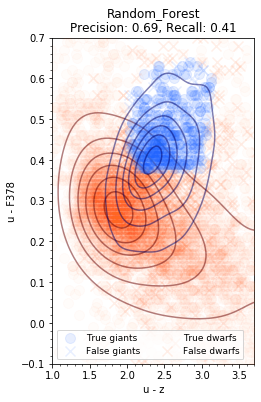

In [5]:
################################################################################
# Code to compare different classifiers to select giant stars in the S-PLUS
# DR1 + SDSS SSPP data - simplified for use in the IX LaPIS hands-on
#
# By: Felipe Almeida-Fernandes
# contact: felipefer42@gmail.com, felipe.almeida.fernandes@usp.br
#
# Feb. 2020
################################################################################

# For this version, only two dimensions are used

################################################################################
# defining the classifiers functions
#
# This is the only place where you need to edit things

# Set which classifier you want the program to use.
# You may also edit its hyperparameters bellow.


filename_of_SPLUS_SSPP_crossmatch = 'SSPP-SPLUS-CROSSMATCH.cat'


classifier = 'Random_Forest'
# Options: 'Random_Forest'      'Decision_Tree'         'Nearest_Neighbors'
#          'LDA'                'QDA'                   'Neural_Net'
#          'Linear_SVM'         'RBF_SVM'               'AdaBoost'
#          'Naive_Bayes'        


# Do you want to plot the contours? It takes a while, but looks better
plot_contours = True


# Random Forest ################################################################


def Random_Forest():
    
    max_depth    = 5  # The maximum depth of the tree.
    n_estimators = 10 # The number of trees in the forest.
    max_features = 1  # The number of features to consider when looking for the 
    pass              # best split
    
    classifier = RandomForestClassifier(max_depth=max_depth, 
                                        n_estimators=n_estimators, 
                                        max_features=max_features)
    return classifier


# Decision Tree ################################################################


def Decision_Tree():
    
    max_depth = 5     # The maximum depth of the tree.
    
    classifier = DecisionTreeClassifier(max_depth=max_depth)
    return classifier


# Nearest Neighbors ############################################################


def Nearest_Neighbors():
    
    n_neighbors = 5     # Number of neighbors to use by default
    
    classifier = KNeighborsClassifier(n_neighbors=n_neighbors)
    return classifier


# LDA ##########################################################################


def LDA():
    
    classifier = LinearDiscriminantAnalysis()
    return classifier


# QDA ##########################################################################


def QDA():
    
    classifier = QuadraticDiscriminantAnalysis()
    return classifier


# Neural Net ###################################################################


def Neural_Net():
    
    alpha    = 1    # L2 penalty (regularization term) parameter.
    max_iter = 1000 # Maximum number of iterations
    
    classifier = MLPClassifier(alpha=alpha, max_iter=max_iter)
    return classifier


# Linear SVM ###################################################################


def Linear_SVM():
    
    C = 0.025 # Regularization parameter. The strength of the regularization is 
    pass      # inversely proportional to C. Must be strictly positive.
    
    classifier = SVC(kernel="linear", C=C)
    return classifier


# RBF SVM ######################################################################


def RBF_SVM():
    
    gamma = 2 # Kernel coefficient.
    C     = 1 # Regularization parameter. The strength of the regularization is
    pass      # inversely proportional to C. Must be strictly positive.
    
    classifier = SVC(gamma=gamma, C=C)
    return classifier


# AdaBoost #####################################################################


def AdaBoost():
    
    classifier = AdaBoostClassifier()
    return classifier


# Naive_Bayes ##################################################################


def Naive_Bayes():
    
    classifier = GaussianNB()
    return classifier


# Gaussian Process #############################################################


def Gaussian_Process():
    
    a = 1.0 # Kernel parameter
    b = 1.0 # Kernel parameter
    
    classifier = GaussianProcessClassifier(a * RBF(b))


################################################################################

#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!
##!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#
#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!
##!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#!#

################################################################################
#
# From here on, make changes at your own risk.
#
################################################################################

# Setting the chosen classifier

print("Importing chosen classifier from scikit-learn...")

if classifier == 'Random_Forest':
    from sklearn.ensemble import RandomForestClassifier
    clf = Random_Forest()

elif classifier == 'Decision_Tree':
    from sklearn.tree import DecisionTreeClassifier
    clf = Decision_Tree()

elif classifier == 'Nearest_Neighbors':
    from sklearn.neighbors import KNeighborsClassifier
    clf = Nearest_Neighbors()

elif classifier == 'LDA':
    from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
    clf = LDA()

elif classifier == 'QDA':
    from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
    clf = QDA()

elif classifier == 'Neural_Net':
    from sklearn.neural_network import MLPClassifier
    clf = Neural_Net()

elif classifier == 'Linear_SVM':
    from sklearn.svm import SVC
    clf = Linear_SVM()

elif classifier == 'RBF_SVM':
    from sklearn.svm import SVC
    clf = RBF_SVM()

elif classifier == 'AdaBoost':
    from sklearn.ensemble import AdaBoostClassifier
    clf = AdaBoost()

elif classifier == 'Naive_Bayes':
    from sklearn.naive_bayes import GaussianNB
    clf = Naive_Bayes()

elif classifier == 'Gaussian_Process':
    from sklearn.gaussian_process.kernels import RBF
    from sklearn.gaussian_process import GaussianProcessClassifier
    classifier = Gaussian_Process

else:
    raise ValueError('The classifier {} is not defined'.format(classifier))

print("The chosen classifier is {}".format(classifier))




################################################################################
# Importing libraries

print('\nImporting libraries')

# Mandatory libraries

import numpy as np
import pandas as pd
import random

# Optional libraries
import warnings


if plot_contours:
    try:
        import scipy.stats as st
        has_st = True
    except ImportError:
        warnings.warn("Scipy could not be imported. No contour plots =(")
        has_st = False
else:
    has_st = False

try:
    from matplotlib import pyplot as plt
    has_plt = True
except ImportError:
    warnings.warn("matplotlib could not be imported. There will be no plots")
    has_plt = False


np.random.seed(0)

################################################################################
# Loading data

print('\nLoading data...')

try:
    
    data = pd.read_csv(filename_of_SPLUS_SSPP_crossmatch, 
                       escapechar = "#",
                       delim_whitespace = True)
except IOError:
    fstr = filename_of_SPLUS_SSPP_crossmatch

    try:
        data = pd.read_csv("failproof.cat", 
                            escapechar = "#",
                            delim_whitespace = True)
        print("\nFor some reason, the file {0} could not be located.".format(fstr))
        print("I'm loading a backup version I did for you anyway.")
        print("You can buy me a beer later.\n\n")

    except IOError:
        data = pd.read_csv("sample_data/failproof.cat", 
                            escapechar = "#",
                            delim_whitespace = True)
        print("\nFor some reason, the file {0} could not be located.".format(fstr))
        print("I'm loading a backup version I did for you anyway.")
        print("You can buy me a beer later.\n\n")   


print("The data was loaded.")
print("It has {0} lines and {1} columns.".format(data.shape[0], data.shape[1]))


# Defining variables to make the code easier to read
u     = data['u']
z     = data['z']
F378  = data['F378']
giant = data['giant'] # Boolean that flags the giant stars selected in topcat
dwarf = ~giant        # Inverts the 'giant' flag to create a flag for dwarfs


# This is a very ugly workaround to remove half of the dwarfs
print("\nRemoving half the dwarfs to make it a little bit easier")
# Remove half of the dwarfs in the Sample to make it easier to classify
giant_id = np.array(range(len(giant)))[giant]
dwarf_id = np.array(range(len(giant)))[dwarf]

Nhalf = int(len(dwarf_id)/2)
dwarf_id = dwarf_id[:Nhalf]

ids = np.concatenate((giant_id, dwarf_id))
u = u[ids]
z = z[ids]
F378 = F378[ids]
giant = giant[ids]
dwarf = dwarf[ids]
print("Now, it has {0} lines.".format(len(ids), data.shape[1]))

# This had to come up here because of a workaround down there...
NN_total = len(giant)

NN_giants = np.sum(giant)
ff_giants = (1.0*NN_giants)/NN_total

NN_dwarfs = np.sum(dwarf)
ff_dwarfs = (1.0*NN_dwarfs)/NN_total

################################################################################
# Running classifier

x = u-z
y = u-F378

# Create the array X
X = np.full((len(x), 2), np.nan)
X[:,0], X[:,1] = x, y

# Set the classification label f
f = giant

# This is another very ugly workaround to separate training and test sample
# Randomizing the training and test sample
ids = np.array(range(len(x)))
np.random.shuffle(ids)

Nhalf = int(len(ids)/2)
f_train = ids[:Nhalf]
f_test = ids[Nhalf:]

print("\nRunning the classifier {0}".format(classifier))
f_pred = clf.fit(X[f_train], np.array(f)[f_train]).predict(X[f_test])

x = np.array(x)[f_test]
y = np.array(y)[f_test]
giant = np.array(giant)[f_test]
dwarf = np.array(dwarf)[f_test]
f = giant

print("Classification is finished")


################################################################################
# Defining usefull functions

def characterize_selection(f_real, f_predict):
    """
    returns the precision, recall and specificity for the results of a classifier
    """
    
    # True positives
    TP = float(np.sum((f_real == True) & (f_real == f_predict)))
    
    # False negatives
    FN = float(np.sum((f_real == True) & (f_real != f_predict)))
    
    # True negatives
    TN = float(np.sum((f_real == False) & (f_real == f_predict)))
    
    # False positives
    FP = float(np.sum((f_real == False) & (f_real != f_predict)))
    
    try:
        precision = TP/(TP+FP)
    except ZeroDivisionError:
        precision = np.nan
    
    try:
        recall = TP/(TP+FN)
    except ZeroDivisionError:
        recall = np.nan
    
    try:
        specificity = TN/(TN+FP)
    except ZeroDivisionError:
        specificity = np.nan
    
    return precision, recall, specificity


def rand_djitter(arr):
    """
    djitter points in a plot to make it look better 
    """
    stdev = 0.005
    return arr + (-1+2*np.random.random(len(arr)))*stdev


################################################################################
# Characterizing the results

precision, recall, specificity = characterize_selection(f, f_pred)

TP = f_pred == f    # True positives
TP_giants = TP[f]   # True positives - Giants
TP_dwarfs = TP[~f]  # True positives - Dwarfs

FP = f_pred != f    # False positives
FP_giants = FP[~f]  # False positives - Giants
FP_dwarfs = FP[f]   # False positives - Dwarfs


################################################################################
# Calculating contours for plot

# Range of the plot
xmin = 1
xmax = 3.7
ymin = -0.1
ymax = 0.7

if has_st:
    xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
    positions = np.vstack([xx.ravel(), yy.ravel()])
    
    print("\nEvaluating densities for contour plot...")
    values_dwarfs = np.vstack([x[dwarf], y[dwarf]])
    kernel_dwarfs = st.gaussian_kde(values_dwarfs)
    zdwarfs = kernel_dwarfs(values_dwarfs)
    dens_dwarfs = np.reshape(kernel_dwarfs(positions).T, xx.shape)
    
    values_giants = np.vstack([x[giant], y[giant]])
    kernel_giants = st.gaussian_kde(values_giants)
    zgiants = kernel_giants(values_giants)
    dens_giants = np.reshape(kernel_giants(positions).T, xx.shape)
    print("Densities are estimated\n")


################################################################################
# Making the plots

print("\nPlotting the data")

if has_plt:
    
    plt.figure(figsize = (4,6))
    
    xg, yg = x[f], y[f]
    xd, yd = x[~f], y[~f]
    
    # Plot True Positive Giants
    plt.scatter(xg[TP_giants], yg[TP_giants], color = "#2266ff", s = 100,
                alpha = 0.1, zorder = 5, label = 'True giants')
    # Plot False Positive Giants
    plt.scatter(xd[FP_giants], yd[FP_giants], color = "#2266ff", s = 100,
                alpha = 0.1, zorder = 4, label = 'False giants', marker = 'x')
    
    # Plot True Negative
    plt.scatter(xd[TP_dwarfs], yd[TP_dwarfs], color = "#ff6622", s = 100,
                alpha = 0.02, zorder = 3, label = 'True dwarfs')
    # Plot False Negative
    plt.scatter(xg[FP_dwarfs], yg[FP_dwarfs], color = "#ff6622", s = 100,
                alpha = 0.1, zorder = 2, label = 'False dwarfs', marker = 'x')
    
    # Plot the contour plots
    if has_st and plot_contours:
        plt.contour(xx, yy, dens_dwarfs, 6, colors= "#660000", 
                    zorder = 4, alpha = 0.5, lw = 0.5)
        plt.contour(xx, yy, dens_giants, 6, colors= "#000066", 
                    zorder = 5, alpha = 0.5, lw = 0.5)
    
    
    plt.gca().set_xlim(xmin,xmax)
    plt.gca().set_ylim(ymin, ymax)
    plt.gca().set_xlabel("u - z")
    plt.gca().set_ylabel("u - F378")
    plt.gca().minorticks_on()
    plt.legend(loc = 3, ncol = 2, fontsize = 9)
    plt.title("{:s}\nPrecision: {:.2f}, Recall: {:.2f}".format(classifier,
                                                               precision,
                                                               recall)) 
    plt.subplots_adjust(left = 0.2)

################################################################################
# Print the Results

print("\n\nFininshed running classification using {}".format(classifier))



N_total  = len(f)

# Number and fraction of giants
N_giants = np.sum(f)
f_giants = (1.0*N_giants)/N_total

# Number and fraction of True Positives and False Positives
N_TP_giants = np.sum(TP_giants)
f_TP_giants = (1.0*N_TP_giants)/N_giants

N_FP_dwarfs = np.sum(FP_dwarfs)
f_FP_dwarfs = (1.0*N_FP_dwarfs)/N_giants

# Number and fraction of dwarfs
N_dwarfs = np.sum(~f)
f_dwarfs = (1.0*N_dwarfs)/N_total

# Number and fraction of True Positives and False Positives
N_TP_dwarfs = np.sum(TP_dwarfs)
f_TP_dwarfs = (1.0*N_TP_dwarfs)/N_dwarfs

N_FP_giants = np.sum(FP_giants)
f_FP_giants = (1.0*N_FP_giants)/N_dwarfs



print ("\nNumbers in the total sample")
print("Giants:  {:d} ({:.2f}%)".format(NN_giants, 100*ff_giants))
print("Dwarfs: {:d} ({:.2f}%)".format(NN_dwarfs, 100*ff_dwarfs))

print("\nSummarizing results for the test sample:\n")

print("\nNumber of giants: {:d} ({:.2f}%)".format(N_giants, 100*f_giants))
print("True Positives:  {:d} ({:.2f}%)".format(N_TP_giants, 100*f_TP_giants))
print("False Negatives: {:d} ({:.2f}%)".format(N_FP_dwarfs, 100*f_FP_dwarfs))


print("\nNumber of dwarfs: {:d} ({:.2f}%)".format(N_dwarfs, 100*f_dwarfs))
print("True Negatives:  {:d} ({:.2f}%)".format(N_TP_dwarfs, 100*f_TP_dwarfs))
print("False Positives: {:d} ({:.2f}%)".format(N_FP_giants, 100*f_FP_giants))

print("\nPrecision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))

################################################################################

print("\nIf you got this far, the code finished running. I hope it worked ;)")

if has_plt:
    print("Remember to close the plot if you want to try again.")
    plt.show()

